In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
results = {}
with open("../../Stitch.jl/analysis_out/cogsci-benchmark-results.json", "r") as f:
    results["stitch-det"] = json.load(f)
with open("../../ProbStitch.jl/analysis_out/cogsci-benchmark-results.json", "r") as f:
    prob_stitch ={int(k): v for k, v in  json.load(f).items()}
    for num_particles in sorted(prob_stitch):
        results[f"stitch-smc-{num_particles}"] = prob_stitch[num_particles]
results = {k: {v["path"]: v["result"] for v in vs} for k, vs in results.items()}

In [3]:
keys_all = [sorted(x) for x in results.values()]
for keys in keys_all:
    assert keys == keys_all[0]

In [4]:
def compute_both(r):
    return np.mean([[x["time_taken"], x["corpus_sizes"][0] - x["corpus_sizes"][-1]] for x in r], 0)

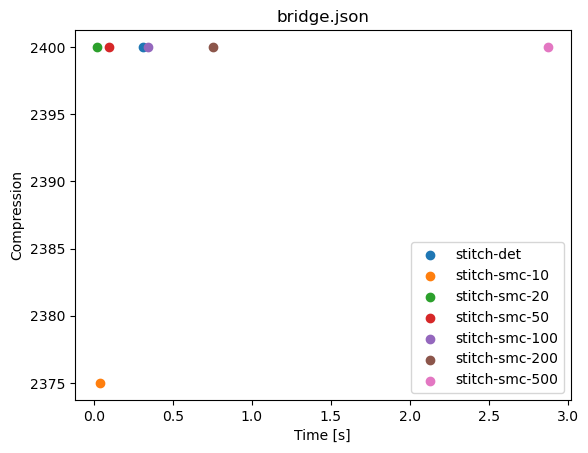

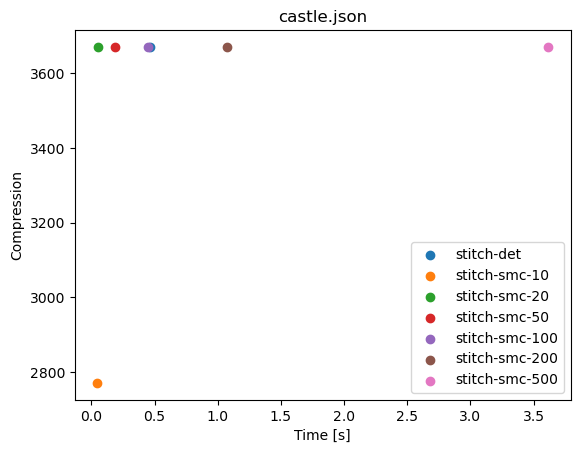

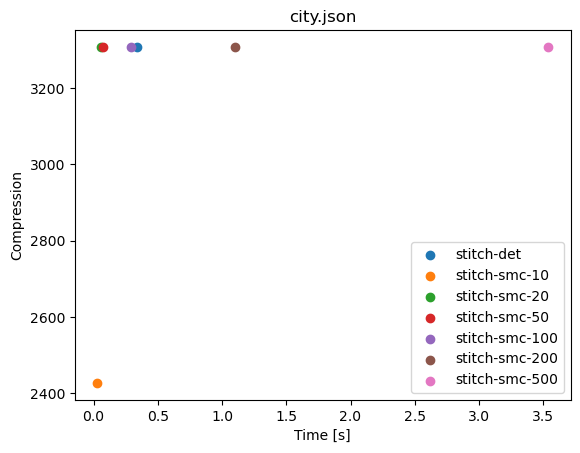

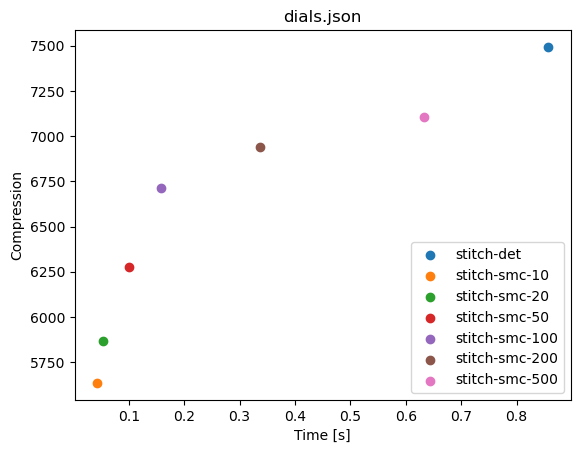

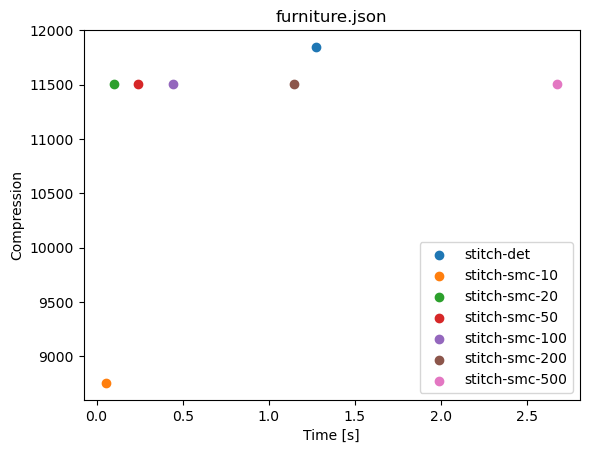

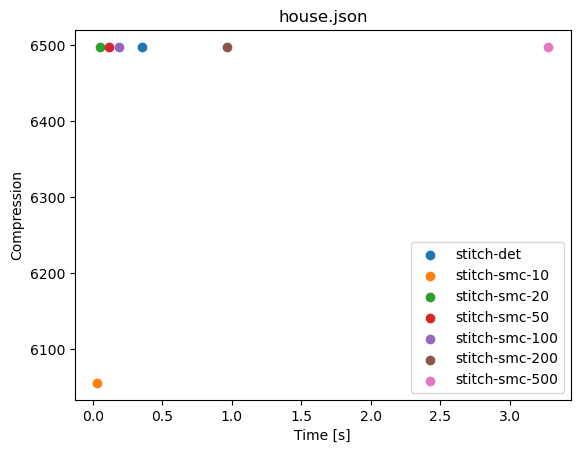

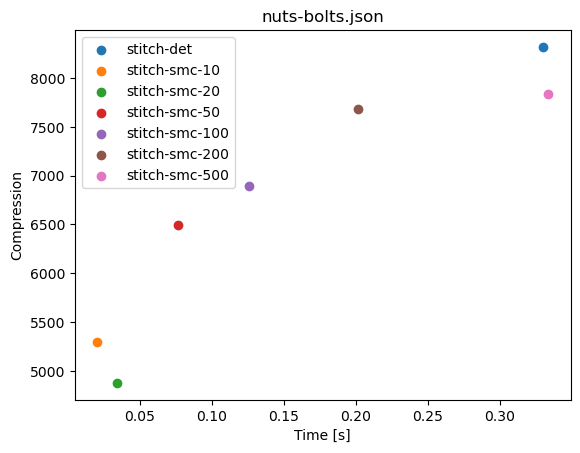

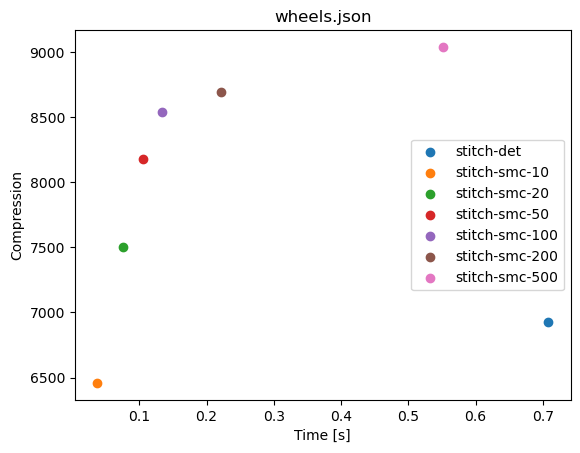

In [5]:
for key in keys:
    ax = plt.gca()
    for algo in results:
        ax.scatter(*compute_both(results[algo][key]), label=algo)
    ax.set_xlabel("Time [s]")
    ax.set_ylabel("Compression")
    ax.legend()
    ax.set_title(key)
    plt.show()

In [6]:
overall = {
    algo: np.sum([
    compute_both(results[algo][key]) for key in keys
], axis=0) for algo in results}

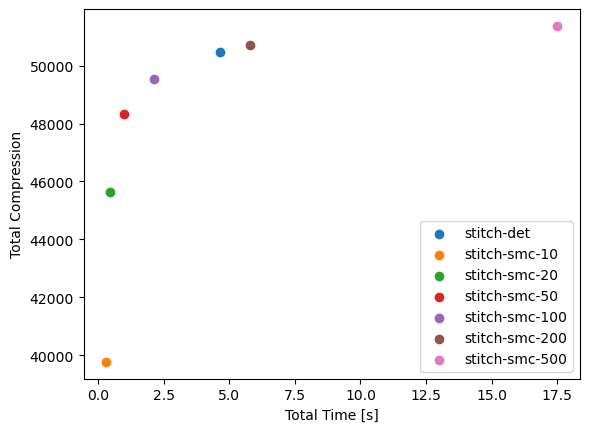

In [7]:
ax = plt.gca()
for algo in overall:
    ax.scatter(*overall[algo], label=algo)
ax.set_xlabel("Total Time [s]")
ax.set_ylabel("Total Compression")
ax.legend()
